In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from rdkit import Chem
from scipy.stats import norm
from genbench3d.geometry import AnglePattern, TorsionPattern, BondPattern
from ccdc import io
from genbench3d.params import CSD_DRUG_SUBSET_PATH
from genbench3d.utils import ccdc_mol_to_rdkit_mol, shift_torsion_values
from genbench3d.geometry import ReferenceGeometry
from genbench3d.data.source import CSDDrug
from tqdm import tqdm
from ccdc.io import Molecule
from rdkit.Chem import Mol
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity
from genbench3d.geometry.von_mises_kde import VonMisesKDE

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [2]:
source = CSDDrug()
rg = ReferenceGeometry(source)

In [2]:
def plot_mixture(mixture):
    n_samples_total = 100000
    all_samples = []

    means = mixture.means_.reshape(-1)
    pis = mixture.weights_.reshape(-1)
    stds = mixture.covariances_.reshape(-1)
    for pi, mean, std in zip(pis, means, stds):
        n_samples = int(pi * n_samples_total)
        # print(n_samples, np.around(mean, 2), np.around(std, 2))
        samples = norm(loc=mean, scale=np.sqrt(std)).rvs(n_samples)
        all_samples.extend(samples)
        
    sns.histplot(all_samples)
    plt.show()
    
    return all_samples

In [3]:
values = rg.read_values()

In [4]:
len(values['torsion'])

35611

In [5]:
len(rg.kernel_densities['torsion'])

5305

In [7]:
list(rg.mixtures['torsion'].keys())[0].to_string()

'C(=O,-O)-C(-N,-H)-C(-H,-H)-C(-C,-H,-H)'

In [8]:
for tp in list(rg.mixtures['torsion'].keys()):
    tp_str = tp.to_string()
    if tp_str.startswith('C{6}()'):
        print(tp_str)
        # print(tp)
    # print(tp_str)

C{6}()~N{6}()~C{6}(~C)-N()
C{6}()~N{6}()~C{6}(-H)~C{6}()
C{6}()~N{6}()~C{6}(~C)-H()
C{6}()-N(-C)-C(-C,-H)-H()
C{6}()~C{6}(-H)~C{6}(-H)~C{6}()
C{6}()~N{6}()~C{6}(-N)~C{6}()
C{6}()~C{6}(~C)-C(-N,-H)-H()
C{6}()~C{6}(-C)~C{6}(-H)~C{6}()
C{6}()-C{6}(=C)-C(-H,-H)-H()
C{6}()=C{6}(-C)-C(-H,-H)-H()
C{6}()-C{6}(~C)~C{6}(~C)-Cl()
C{6}()~C{6}(-Cl)~C{6}(~C)-Cl()
C{6}()~N{6}()~C{6}(-N)~N{6}()
C{6}()~N{6}()~C{6}(~N)-N()
C{6}()-C{6}(~N)~C{6}(-N)~N{6}()
C{6}()-C{6}(~N)~C{6}(~N)-N()
C{6}()~C{6}(~N)-N(-H)-H()
C{6}()~C{6}(-Cl)~C{6}(-Cl)~C{6}()
C{6}()~C{6}(~N)-C{6}(~C)~C{6}()
C{6}()~C{6}(-Cl)~C{6}(~C)-H()
C{6}()~C{6}(-Cl)~C{6}(-H)~C{6}()
C{6}()~C{6}(-Cl)~C{6}(-C)~C{6}()
C{6}()~C{6}(-Cl)~C{6}(~C)-C{6}()
C{6}()-C{6}(~C)~C{6}(-H)~C{6}()
C{6}()-C{6}(~C)~C{6}(~C)-H()
C{6}()~C{6}(~C)-C(-C,-H)-H()
C{6}()~C{6}(~C)-C(-H,-H)-C()
C{6}()~C{6,6}(~C)-N{6}(-H)-C{6}()
C{6}()~C{6,6}(~C)-C{6}(-H,-H)-C{6}()
C{6}()-C{6}(-H,-H)-C{6}(=O)-N{6}()
C{6}()-C{6}(-H,-H)-C{6}(-N)=O()
C{6}()~C{6,6}(-N)~C{6,6}(~C)-C{6}()
C{6}()-C{6,6}(~C

In [13]:
kd.bandwidth

100.0

In [13]:
gkd.kernel_density

KernelDensity(bandwidth=10.009171243324968)

In [15]:
likelihoods

array([0.03985172, 0.03985173, 0.03985175, ..., 0.03985424, 0.03985423,
       0.03985421])

In [ ]:
pattern_type = 'bond'
pattern_str = ''

  0%|                                                      | 0/100 [00:00<?, ?it/s]

C(=O,-O)-C(-N,-H)-C(-H,-H)-C(-C,-H,-H)
0.9981300316507525


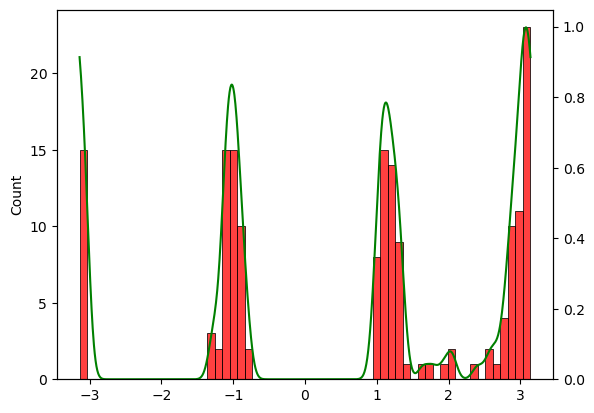

  1%|▍                                             | 1/100 [00:00<00:35,  2.79it/s]

C(=O,-O)-C(-N,-H)-C(-C,-H)-H()
0.8172899675937434


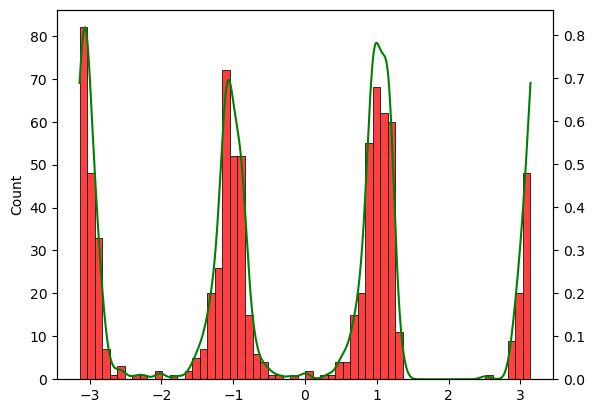

  2%|▉                                             | 2/100 [00:00<00:33,  2.96it/s]

H()-N[+1](-H,-H)-C(-C,-H)-C(=O,-O)
0.8550756220400316


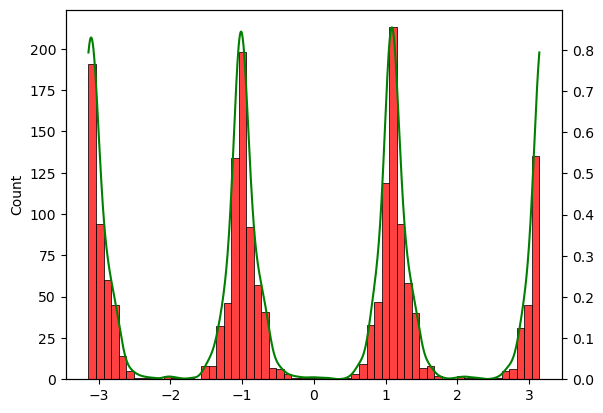

  3%|█▍                                            | 3/100 [00:01<00:32,  2.99it/s]

H()-C(-C,-H)-C(-H,-H)-C(-N,-C,-H)
1.2676380855268543


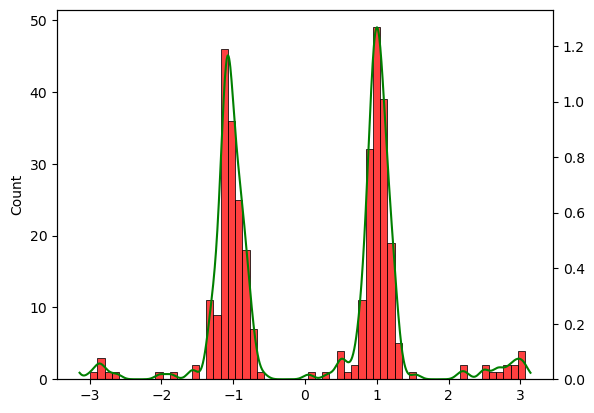

  4%|█▊                                            | 4/100 [00:01<00:31,  3.04it/s]

C(-C,-H,-H)-C(-N,-H)-C(=O)-O[-1]()
0.9267663282549413


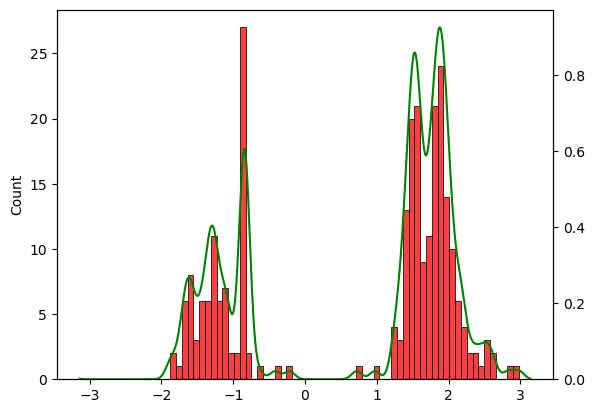

  5%|██▎                                           | 5/100 [00:01<00:30,  3.09it/s]

C(-C,-H,-H)-C(-N,-H)-C(-O)=O()
0.6208723576756441


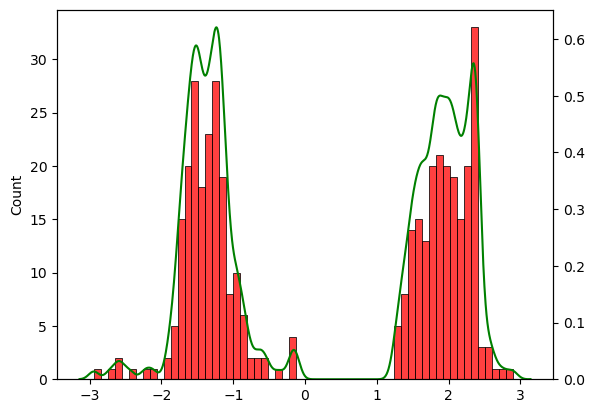

  6%|██▊                                           | 6/100 [00:01<00:30,  3.09it/s]

H()-N[+1](-H,-H)-C(-C,-H)-C(-C,-H,-H)
0.7092632465259121


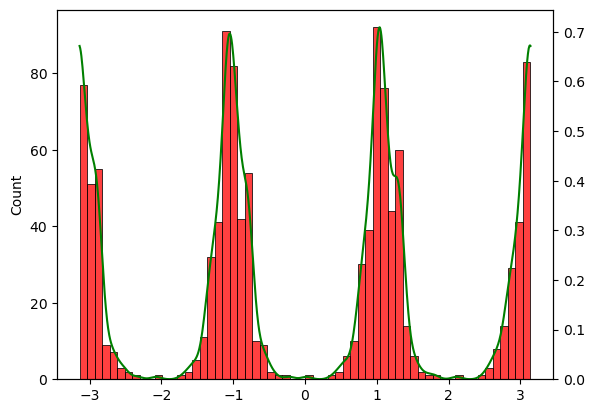

  7%|███▏                                          | 7/100 [00:02<00:30,  3.09it/s]

N[+1](-H,-H,-H)-C(-C,-H)-C(-H,-H)-C(-C,-H,-H)
1.0713388705651583


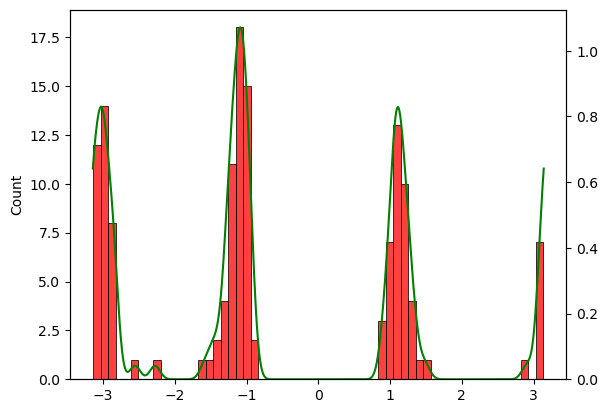

  8%|███▋                                          | 8/100 [00:02<00:29,  3.11it/s]

H()-C(-N,-C)-C(-H,-H)-C(-C,-H,-H)
0.9381043728606707


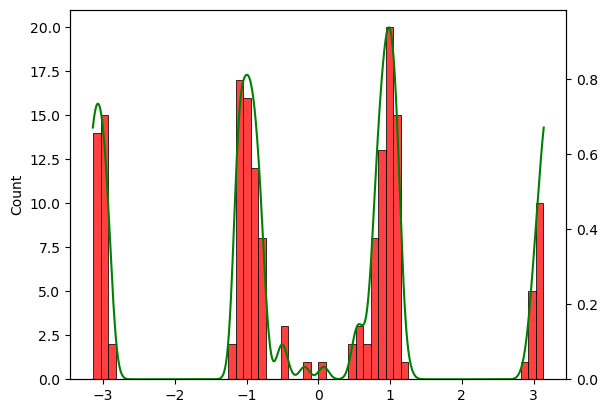

  9%|████▏                                         | 9/100 [00:02<00:29,  3.12it/s]

H()-N(-H)-C(=O)-C(-C,-H,-H)
2.2332728031249443


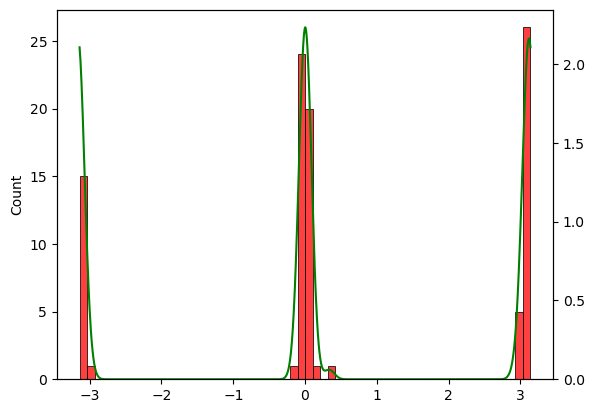

 10%|████▌                                        | 10/100 [00:03<00:28,  3.14it/s]

H()-C(-C,-H)-C(-H,-H)-C(=O,-N)
1.5870092210997269


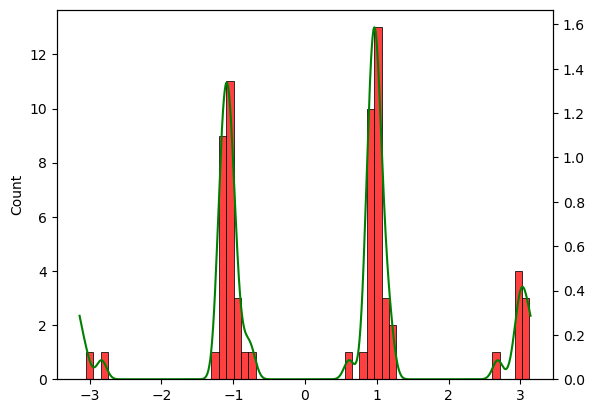

 11%|████▉                                        | 11/100 [00:03<00:28,  3.12it/s]

N[+1](-H,-H,-H)-C(-C,-H)-C(=O)-O[-1]()
1.1250107608932651


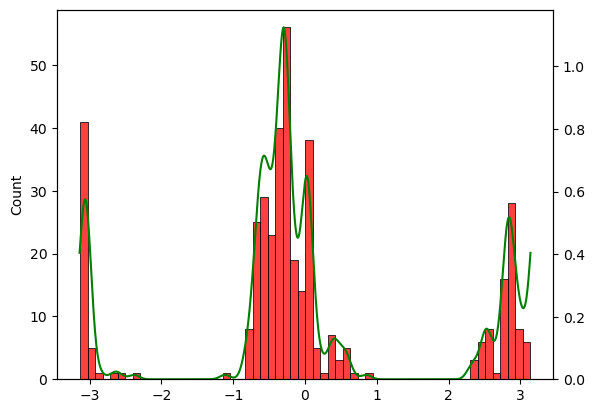

 12%|█████▍                                       | 12/100 [00:03<00:28,  3.13it/s]

N[+1](-H,-H,-H)-C(-C,-H)-C(-O)=O()
0.7859702066909645


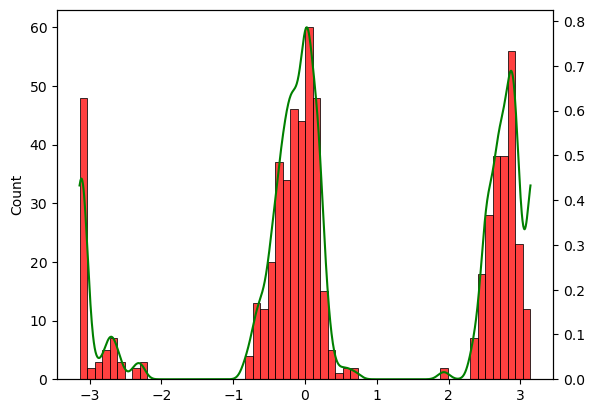

 13%|█████▊                                       | 13/100 [00:04<00:28,  3.09it/s]

N[+1](-H,-H,-H)-C(-C,-H)-C(-C,-H)-H()
0.8004747632491493


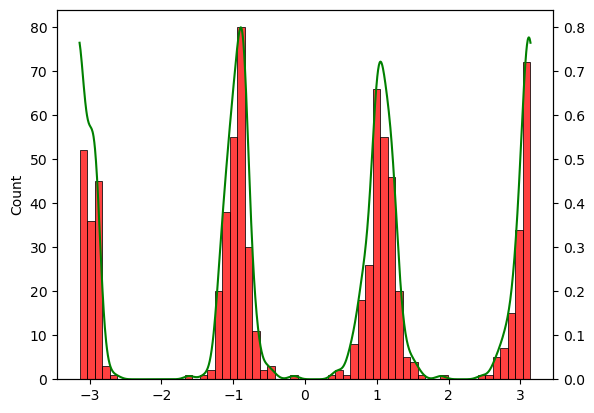

 14%|██████▎                                      | 14/100 [00:04<00:28,  3.06it/s]

H()-C(-C,-H)-C(=O)-N(-H,-H)
1.6249471063297252


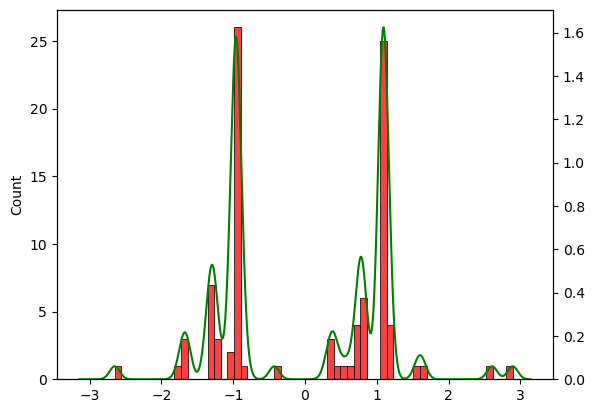

 15%|██████▊                                      | 15/100 [00:04<00:27,  3.07it/s]

H()-C(-N,-C)-C(=O)-O[-1]()
1.1148489063146094


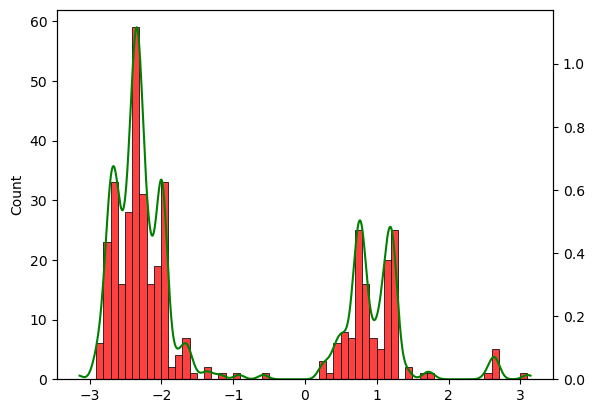

 16%|███████▏                                     | 16/100 [00:05<00:27,  3.10it/s]

H()-C(-C,-H)-C(-N)=O()
0.940179739024291


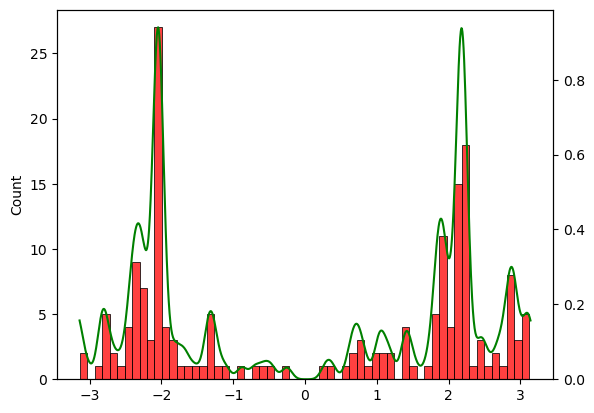

 17%|███████▋                                     | 17/100 [00:05<00:26,  3.14it/s]

H()-N(-H)-C(-C)=O()
2.1988527969963556


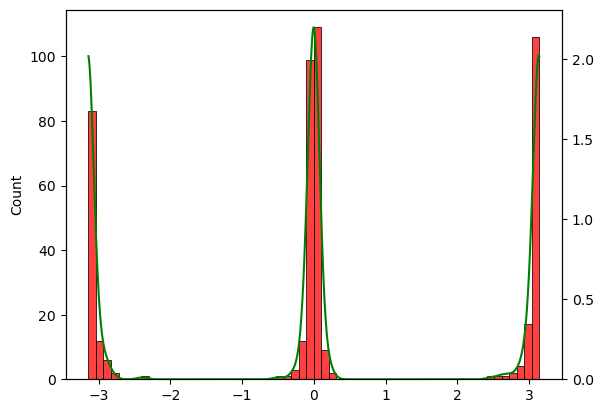

 18%|████████                                     | 18/100 [00:05<00:25,  3.18it/s]

H()-C(-N,-C)-C(-O)=O()
0.6567242070810172


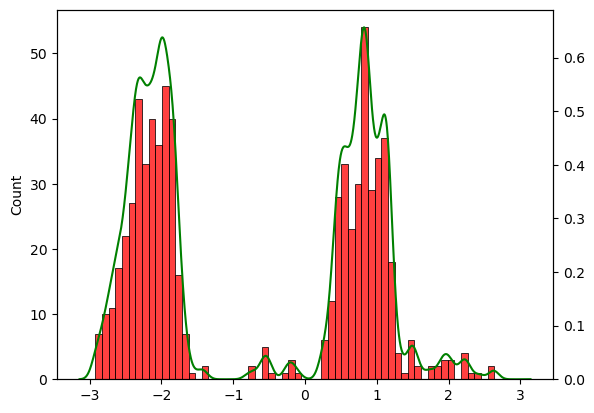

 19%|████████▌                                    | 19/100 [00:06<00:25,  3.19it/s]

H()-C(-N,-C)-C(-C,-H)-H()
0.759536374009089


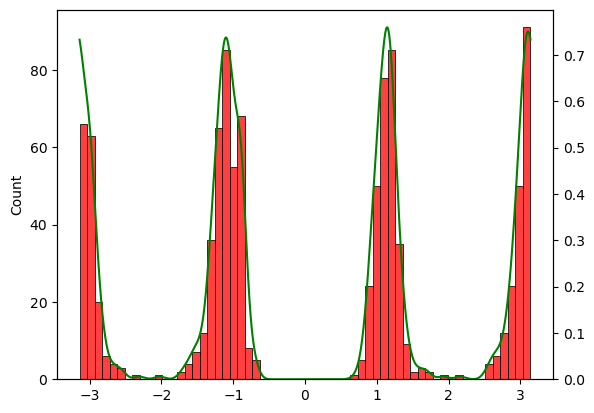

 20%|█████████                                    | 20/100 [00:06<00:25,  3.20it/s]

H()-N[+1](-H,-H)-C(-C,-C)-H()
0.8153589828333238


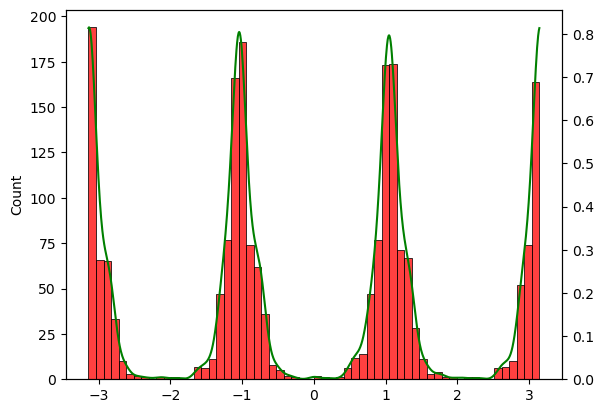

 21%|█████████▍                                   | 21/100 [00:06<00:24,  3.17it/s]

H()-C(-C,-H)-C(-C,-H)-H()
1.638792226792006


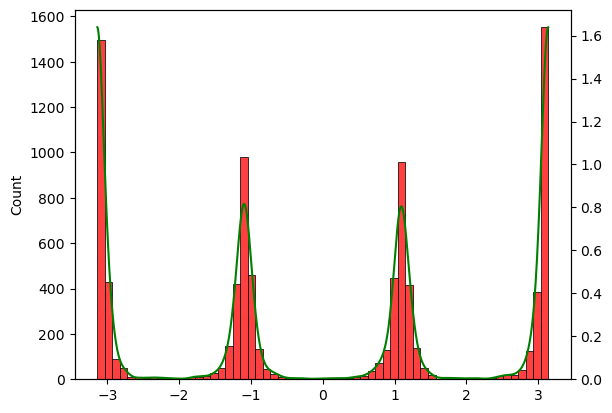

 22%|█████████▉                                   | 22/100 [00:07<00:24,  3.15it/s]

N{6}(~C)~C{6}(-N)~C{6}(-H)~C{6}(~C,-H)
5.207404608583177


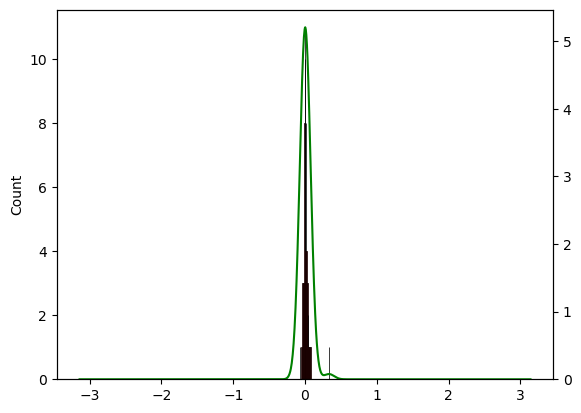

 23%|██████████▎                                  | 23/100 [00:07<00:24,  3.17it/s]

N{6}(~C)~C{6}(-N)~C{6}(~C)-H()
4.681109479516756


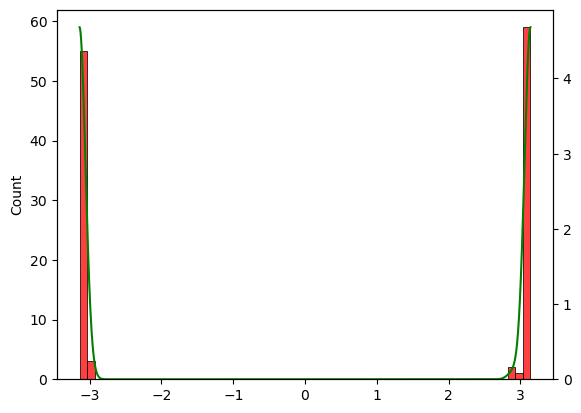

 24%|██████████▊                                  | 24/100 [00:07<00:23,  3.19it/s]

N{6}(~C)~C{6}(-H)~C{6}(-H)~C{6}(~C,-H)
5.254728448917543


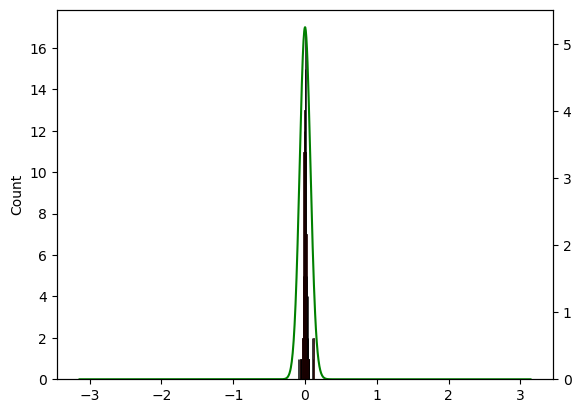

 25%|███████████▎                                 | 25/100 [00:08<00:23,  3.17it/s]

H()-C{6}(~C)~C{6}(-H)~N{6}(~C)
5.112723162173989


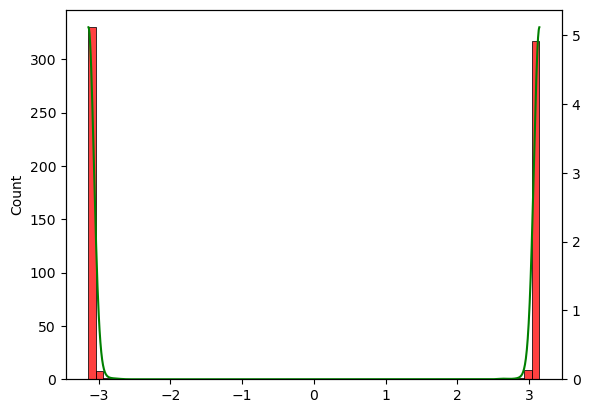

 26%|███████████▋                                 | 26/100 [00:08<00:23,  3.16it/s]

H()-C(-N,-H)-C(-H,-H)-N[+1](-C,-C,-H)
1.4620925177360755


 26%|███████████▋                                 | 26/100 [00:08<00:24,  3.01it/s]


KeyboardInterrupt: 

In [4]:
pattern_type = 'torsion'
items_list = list(rg.kernel_densities[pattern_type].items())
import time
start_time = time.time()
for pattern, gkd in tqdm(items_list[:100]) :
    print(pattern.to_string())
    pattern_values = values[pattern_type][pattern]
    kd = gkd.kernel_density
    print(gkd.max_likelihood)
    n_samples_total = len(pattern_values)
    all_samples = []

    # means = mixture.means_.reshape(-1)
    # pis = mixture.weights_.reshape(-1)
    # stds = mixture.covariances_.reshape(-1)
    # for pi, mean, std in zip(pis, means, stds):
    #     n_samples = int(pi * n_samples_total)
    #     # print(n_samples, np.around(mean, 2), np.around(std, 2))
    #     samples = norm(loc=mean, scale=np.sqrt(std)).rvs(n_samples)
    #     all_samples.extend(samples)

    if pattern_type == 'bond':
        padding = 0.05
        min_linspace = np.min(pattern_values) - padding
        max_linspace = np.max(pattern_values) + padding
    elif pattern_type == 'angle':
        padding = 5
        min_linspace = np.min(pattern_values) - padding
        max_linspace = np.max(pattern_values) + padding
    else:
        min_linspace = -np.pi
        max_linspace = np.pi
        pattern_values = np.radians(pattern_values)
        
    linspace = np.linspace(min_linspace, max_linspace, 10000)
    # linspace = np.append(linspace, means)
    
    # log_likelihoods = mixture.score_samples(np.array(pattern_values).mean().reshape(-1, 1))
    
    # kd = KernelDensity(bandwidth=0.01)
    # kd.fit(np.array(pattern_values).reshape(-1, 1))
    # kd = KernelDensity(bandwidth=1.0)
    # kd.fit(np.array(pattern_values).reshape(-1, 1))
    # kd = VonMisesKDE(bandwidth=200.0)
    # kd.fit(np.array(pattern_values).reshape(-1, 1))
    log_likelihoods = kd.score_samples(linspace.reshape(-1, 1))
    
    likelihoods = np.exp(log_likelihoods.reshape(-1))

    fig, ax = plt.subplots()
    sns.histplot(pattern_values, color='red', ax=ax, bins=60)
    # ax2 = ax.twinx()
    # sns.histplot(all_samples, ax=ax2)
    sns.histplot(all_samples)
    ax3 = ax.twinx()
    sns.lineplot(x=linspace, y=likelihoods, ax=ax3, color='green')
    ax3.set_ylim(0)
    plt.show()

print(time.time() - start_time)

In [7]:
likelihoods.sum() * (linspace[1] - linspace[0])

1.0002781903814761

In [21]:
pattern_type = 'angle'
pattern_str = 'C(-C,-C,-H)-N[+1](-H,-H)-H()'
pattern = AnglePattern.from_string(pattern_str)
geometry_mixture = rg.mixtures['angle'][pattern]
pattern_values = values[pattern_type][pattern]

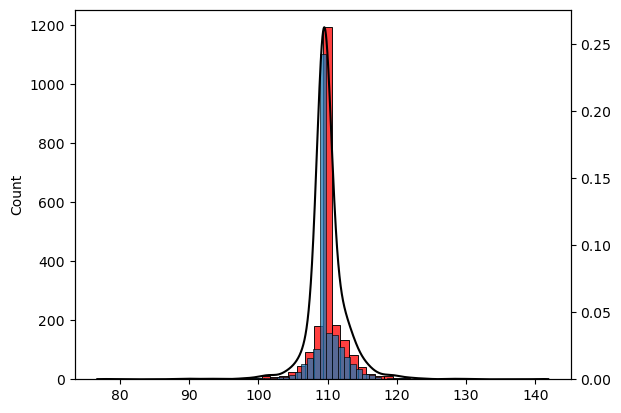

In [49]:
# current_mixture = new_mixture
current_mixture = geometry_mixture.mixture

n_samples_total = len(pattern_values)
# n_samples_total = 1000
all_samples = []

means = current_mixture.means_.reshape(-1)
pis = current_mixture.weights_.reshape(-1)
stds = current_mixture.covariances_.reshape(-1)
for pi, mean, std in zip(pis, means, stds):
    n_samples = int(pi * n_samples_total)
    # print(n_samples, np.around(mean, 2), np.around(std, 2))
    samples = norm(loc=mean, scale=np.sqrt(std)).rvs(n_samples)
    all_samples.extend(samples)

if pattern_type == 'bond':
    padding = 0.05
else:
    padding = 1
linspace = np.linspace(np.min(pattern_values) - padding, np.max(pattern_values) + padding, 10000)
linspace = np.append(linspace, means)
# log_likelihoods = current_mixture.score_samples(linspace.reshape(-1, 1))
kd = KernelDensity(bandwidth=1.0)
kd.fit(np.array(pattern_values).reshape(-1, 1))
log_likelihoods = kd.score_samples(linspace.reshape(-1, 1))
likelihoods = np.exp(log_likelihoods.reshape(-1))
# norm_likelihoods = likelihoods / np.max(likelihoods)


fig, ax = plt.subplots()
sns.histplot(pattern_values, color='red', ax=ax, bins=50)
# ax2 = ax.twinx()
# sns.histplot(all_samples, ax=ax2)
sns.histplot(all_samples, bins=50)
ax3 = ax.twinx()
sns.lineplot(x=linspace, y=likelihoods, ax=ax3, color='black')
ax3.set_ylim(0)

plt.show()

In [30]:
np.sum(likelihoods > 0.005)

1995

In [31]:
len(likelihoods)

2073

In [29]:
log_likelihoods = current_mixture.score_samples(np.array(pattern_values).reshape(-1, 1))
likelihoods = np.exp(log_likelihoods.reshape(-1))

In [163]:
np.argmin(np.square(linspace - np.min(pattern_values)))

1946

In [174]:
linspace[1] - linspace[0]

0.0025695080798158187

In [17]:
new_mixture = GaussianMixture(n_components=3, reg_covar=1e-2)
new_mixture.fit(np.array(pattern_values).reshape(-1, 1))
current_mixture = new_mixture
padding = 100
linspace = np.linspace(np.min(pattern_values) - padding, np.max(pattern_values) + padding, 10000)
log_likelihoods = current_mixture.score_samples(linspace.reshape(-1, 1))
likelihoods = np.exp(log_likelihoods.reshape(-1))
np.sum(likelihoods) * (linspace[1] - linspace[0])

0.9999999999999208

In [185]:
linspace

array([ 15.99844958,  15.99866528,  15.99888097, ..., 231.69052949,
       231.69074518, 231.69096087])

In [162]:
linspace - np.min(pattern_values)

array([-5.        , -4.99743049, -4.99486098, ...,  5.53798138,
       15.69251129,  2.65854238])

In [156]:
np.min(pattern_values)

115.99844958418356

In [168]:
linspace[1900]

115.88051493582465

In [166]:
norm_likelihoods[1900]

0.0017166270463491891

In [104]:
from scipy.stats import norm

In [149]:
new_mixture = GaussianMixture(n_components=3, reg_covar=1e-6)
new_mixture.fit(np.array(pattern_values).reshape(-1, 1))

GaussianMixture(n_components=3)

In [142]:
for reg_covar in np.arange(1.0, 8.0, 0.5):
    new_mixture = GaussianMixture(n_components=3, reg_covar=10**-reg_covar)
    new_mixture.fit(np.array(pattern_values).reshape(-1, 1))
    print(new_mixture.bic(np.array(pattern_values).reshape(-1, 1)))

343.6863698400164
341.95119425123073
340.90246539000174
339.7726846926526
338.43823033271485
337.4824321286374
336.1430994405369
334.9918578702318
333.7741187067228
332.6892942520289
331.7274616240765
330.3867113148273
329.4248808279527
328.0841264374955


In [108]:
mixture.converged_

True

In [107]:
for pi, mean, std in zip(pis, means, stds):
    print(pi, mean, std, norm.pdf(mean, loc=mean, scale=np.sqrt(std)) * pi)

0.7517228773842459 121.59701612595747 0.6945134214578058 0.35985497552463125
0.23728811162676328 119.55814874377185 3.2918455655726753 0.05217546397783806
0.010989010988990883 131.69096087421445 1e-06 4.383981103304426


In [103]:
log_likelihoods

array([-14.08192286, -14.07524244, -14.06856402, ...,  -0.94777065,
        -2.65608878,   1.47795724])

In [20]:
pattern_type = 'angle'
for pattern, geometry_mixture in rg.mixtures[pattern_type].items() :
    # print(pattern.to_string())
    pattern_values = values[pattern_type][pattern]
    mixture = geometry_mixture.mixture
    n_samples_total = len(pattern_values)
    all_samples = []

    pis = mixture.weights_.reshape(-1)
    means = mixture.means_.reshape(-1)
    stds = mixture.covariances_.reshape(-1)

    if len(pis) > 1:

        weight_sort = np.argsort(-pis)
        pis = pis[weight_sort]
        means = means[weight_sort]
        stds = stds[weight_sort]
        log_likelihoods = mixture.score_samples(means.reshape(-1, 1))
        likelihoods = np.exp(log_likelihoods.reshape(-1))

        if np.max(likelihoods) > 1 and stds[np.argmax(likelihoods)] != 1e-6:
        
        # if np.argmax(likelihoods) == len(likelihoods) - 1:
            print(pattern.to_string())
            import pdb;pdb.set_trace()
        

C(-C,-C,-H)-N[+1](-H,-H)-H()
> /tmp/ipykernel_234465/2745441284.py(2)<module>()
      1 pattern_type = 'angle'
----> 2 for pattern, geometry_mixture in rg.mixtures[pattern_type].items() :
      3     # print(pattern.to_string())
      4     pattern_values = values[pattern_type][pattern]
      5     mixture = geometry_mixture.mixture



ipdb>  likelihoods


array([0.08489456, 5.05772918, 0.08480691])


ipdb>  stds


array([5.27277417e+00, 1.32050897e-03, 7.17593144e+01])


ipdb>  pis


array([0.46711448, 0.453468  , 0.07941752])


ipdb>  exit


In [78]:
pis

array([0.75172288, 0.23728811, 0.01098901])

In [69]:
import copy

In [93]:

new_mixture = GaussianMixture(n_components=10, reg_covar=1e-2)
new_mixture.fit(np.array(pattern_values).reshape(-1, 1))

GaussianMixture(n_components=10, reg_covar=0.01)

In [94]:
new_mixture.precisions_cholesky_

array([[[ 5.18102994]],

       [[ 4.22416689]],

       [[10.        ]],

       [[ 3.29652765]],

       [[ 2.28250753]],

       [[ 4.31770692]],

       [[ 9.17067675]],

       [[ 3.70299202]],

       [[ 4.29061959]],

       [[ 4.11260134]]])

In [91]:
new_mixture.covariances_

array([[[0.80549315]],

       [[0.01      ]],

       [[2.4029343 ]]])

In [87]:
new_mixture.means_

array([[121.5360538 ],
       [131.69096087],
       [118.65608993]])

In [79]:
copy_mixture.precisions_cholesky_

array([[[1.19994041e+00]],

       [[5.51163277e-01]],

       [[1.00000000e+03]]])

In [100]:
copy_mixture.weights_

array([0.75172288, 0.23728811, 0.01098901])

In [70]:
copy_mixture = copy.deepcopy(mixture)

In [75]:
copy_mixture.covariances_ = np.array([[[6.94513421e-01]], [[3.29184557e+00]], [[1.00000000e-02]]])

In [76]:
copy_mixture.covariances_ 

array([[[0.69451342]],

       [[3.29184557]],

       [[0.01      ]]])

In [55]:
pis

array([0.41563943, 0.58286357, 0.00149701])

In [54]:
np.array(pattern_values)[np.argsort(pattern_values)]

array([115.47725633, 120.73449784, 120.94005591, 121.13560724,
       121.3768731 , 121.46933757, 121.48379393, 121.52775021,
       121.55754924, 121.58366422, 121.6289252 , 121.63721096,
       121.63760089, 121.79302   , 121.804902  , 121.8108785 ,
       121.86913549, 121.8784962 , 121.91138604, 121.95837062,
       121.96481619, 122.00292505, 122.01357779, 122.03533341,
       122.06734665, 122.07188736, 122.10735836, 122.15814238,
       122.18612735, 122.18919915, 122.18919915, 122.18992082,
       122.19804167, 122.20173138, 122.22408285, 122.23314221,
       122.26542255, 122.26665954, 122.26905995, 122.27090703,
       122.28148629, 122.28689067, 122.2956123 , 122.3072337 ,
       122.31932084, 122.32068044, 122.34340006, 122.35400401,
       122.37618401, 122.37805126, 122.38031077, 122.39979434,
       122.4028256 , 122.43299227, 122.43299227, 122.43334881,
       122.44303359, 122.46273604, 122.46284423, 122.50705492,
       122.54551649, 122.54551649, 122.54854302, 122.54

In [50]:
likelihoods

array([4.22073603e-39, 4.34683368e-39, 4.47667619e-39, ...,
       4.75485568e-01, 5.16884750e-01, 5.97218983e-01])

In [29]:
patterns = [
    ('C{6}(~C,~C)-C(=O,-C)', 'bond'),
    ('O()=C(-C)-C(-H,-H,-H)', 'angle'),
    ('C{6}(~C,-H)~C{6}(~C)-C(-C)=O()', 'torsion'),
            ]

In [33]:
pattern_class = {'bond': BondPattern,
                'angle': AnglePattern,
                'torsion': TorsionPattern}

In [43]:
sns.set_context('talk')

In [47]:
colorblind_palette = sns.color_palette("colorblind")

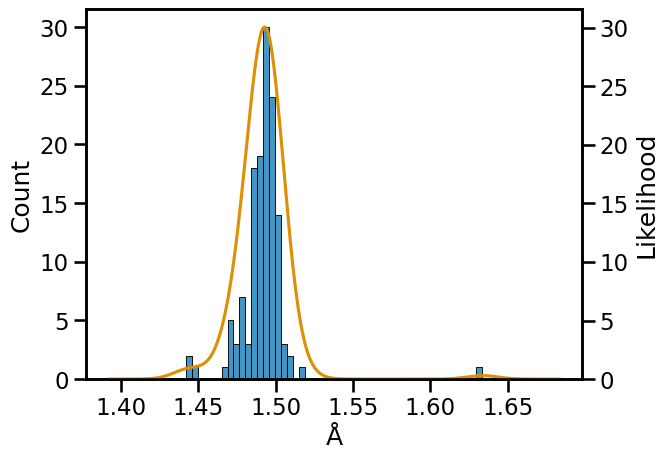

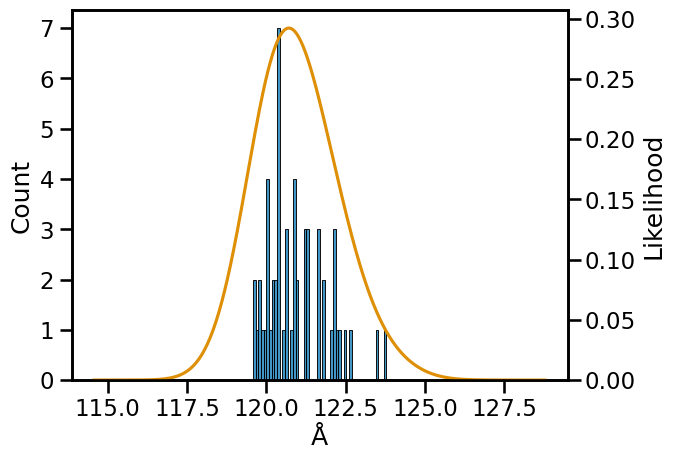

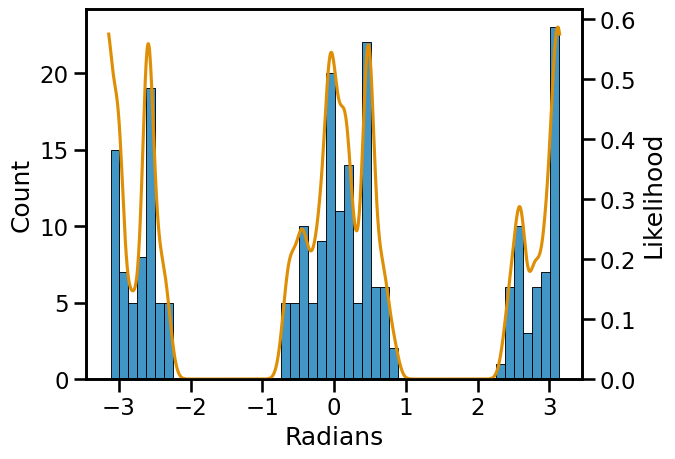

In [53]:
for pattern_str, pattern_type in patterns:
    pattern = pattern_class[pattern_type].from_string(pattern_str)
    assert pattern in values[pattern_type]
    geometry_kd = rg.kernel_densities[pattern_type][pattern]
    geometry_values = values[pattern_type][pattern]
    if pattern_type == 'torsion':
        geometry_values = np.radians(geometry_values)
        samples = np.linspace(-np.pi, np.pi, 1000)
        unit_name = 'Radians'
    else:
        unit_name = 'Å'
        vmin = np.min(geometry_values)
        vmax = np.max(geometry_values)
        if pattern_type == 'bond':
            padding = 0.05
        else:
            padding = 5
        samples = np.linspace(vmin - padding,
                             vmax + padding,
                             1000)
    log_likelihoods = geometry_kd.kernel_density.score_samples(samples.reshape(-1, 1))
    likelihoods = np.exp(log_likelihoods.squeeze())

    fig, ax = plt.subplots()
    sns.histplot(geometry_values, bins=50, ax=ax, color=colorblind_palette[0])
    ax2 = ax.twinx()
    sns.lineplot(x=samples, y=likelihoods, ax=ax2, 
                 color=colorblind_palette[1]
                )
    ax2.set_ylim(0)
    ax2.set_ylabel('Likelihood')
    ax.set_xlabel(unit_name)
    plt.savefig(f'figures/{pattern_type}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

In [9]:
# pattern_str = 'C(=O,-O)-C(-N,-H)-C(-H,-H)-C(-C,-H,-H)'
pattern_str = 'C{6}(~C,-H)~C{6}(~C)-C(-C)=O()'
# pattern_str = 'O()-C()-C{6}()-C{6}()'
# pattern_str = 'O()-C(-C)-C{6}(~C)~C{6}(~C,-H)'
pattern = TorsionPattern.from_string(pattern_str)

In [10]:
pattern in values['torsion']

True

In [12]:
geometry_kd = rg.kernel_densities['torsion'][pattern]

In [13]:
try:
    geometry_kd = rg.kernel_densities['torsion'][pattern]
except:
    geometry_kd = rg.kernel_densities['torsion'][pattern.generalize()]
geometry_values = values['torsion'][pattern]

In [23]:
samples = np.linspace(-np.pi, np.pi, 1000)
log_likelihoods = geometry_kd.kernel_density.score_samples(samples.reshape(-1, 1))
likelihoods = np.exp(log_likelihoods.squeeze())

In [20]:
kd_l = kd.score_samples(np.array(samples).reshape(-1, 1))

In [21]:
kd_l.squeeze()

array([-4.38128691, -3.91153804, -4.76431592, ..., -5.10259201,
       -5.39284539, -5.61575789])

In [47]:
kd.tree_

(0.0, 0.6165165442968668)

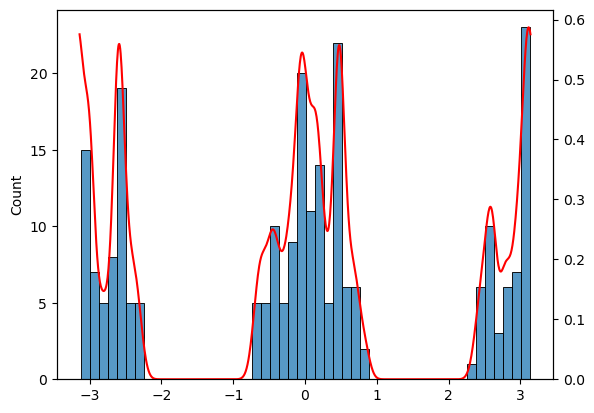

In [24]:
fig, ax = plt.subplots()
sns.histplot(np.radians(geometry_values), bins=50, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=samples, y=likelihoods, ax=ax2, color='red')
ax2.set_ylim(0)

(0.0, 0.2429287498593313)

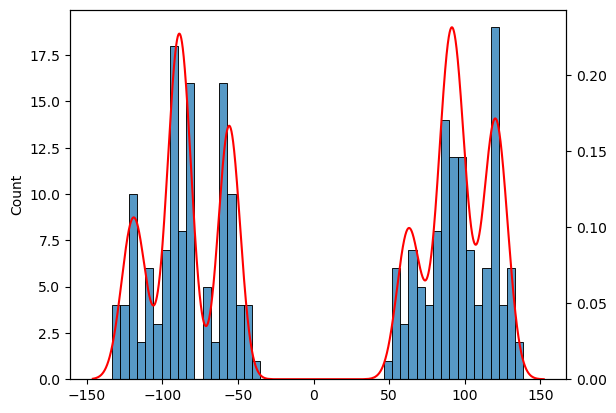

In [24]:
fig, ax = plt.subplots()
sns.histplot(shifted_values, bins=50, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=samples, y=likelihoods, ax=ax2, color='red')
ax2.set_ylim(0)

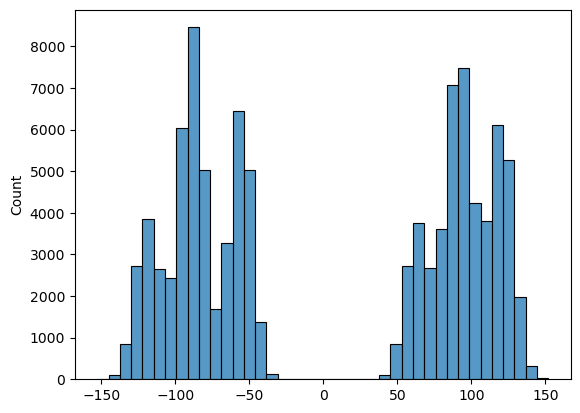

In [17]:
mixture = geometry_mixture.mixture
samples = plot_mixture(mixture)

In [28]:
geometry_mixture

GeometryMixture(mixture=GaussianMixture(n_components=4), max_likelihood=0.3858086250799358, shift=0)

In [23]:
mixture.means_

array([[ 121.3434291 ],
       [ -55.53688821],
       [  -5.64616865],
       [-113.6360854 ]])

<Axes: ylabel='Count'>

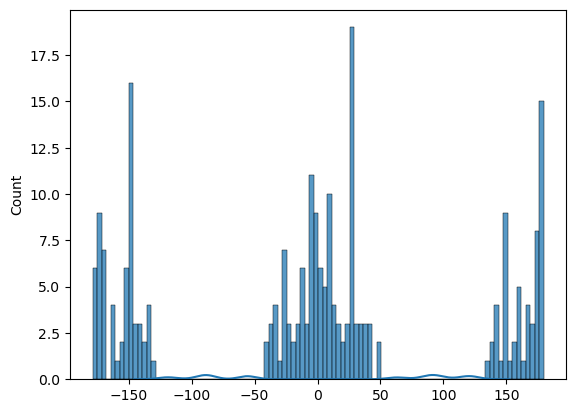

In [21]:
likelihoods = rg.get_likelihoods(mixture, samples)
sns.histplot(geometry_values, bins=100)
sns.lineplot(x=samples, y=likelihoods)

In [ ]:
with open('../hdd/ThreeDGenMolBenchmark/data/CSDDrug_geometry_values.p', 'rb') as f:
    values = pickle.load(f)

In [ ]:
pattern_str = 'N{6,6,5,5,5}(~C,-H)~C{6,6,5,5,5}(~C)~C{6,6,5,5,5}(~N,~C)'
pattern = AnglePattern.from_string(pattern_str)

In [ ]:
try:
    geometry_mixture = rg.mixtures['angle'][pattern]
except:
    geometry_mixture = rg.mixtures['angle'][pattern.generalize()]
geometry_values = values['angle'][pattern]

In [ ]:
sns.histplot(geometry_values, bins=100)

In [ ]:
mixture = geometry_mixture.mixture
samples = plot_mixture(mixture)

In [ ]:
mixture.means_

In [ ]:
likelihoods = rg.get_likelihoods(mixture, samples)
sns.lineplot(x=samples, y=likelihoods)

In [41]:
mol_iterator = io.MoleculeReader('CSD')
subset_path = CSD_DRUG_SUBSET_PATH
subset_csd_ids = []
with open(subset_path, 'r') as f:
    for line in f.readlines():
        subset_csd_ids.append(line.strip())

In [46]:
writer = Chem.SDWriter('pattern_mols2.sdf')

for csd_id in tqdm(subset_csd_ids):
    try:
        include = False
        original_mol = mol_iterator.molecule(csd_id)
        if isinstance(original_mol, Molecule):
            try:
                mol = ccdc_mol_to_rdkit_mol(original_mol)
            except Exception as e:
                logging.warning('CCDC mol could not be converted to RDKit :' + str(e))
                mol = None
        else:
            mol = original_mol
        
        if mol is not None:
            assert isinstance(mol, Mol)
            Chem.SanitizeMol(mol)
            
            mol_angle_values = rg.get_mol_angle_values(mol)
            for angle_pattern, angle_values in mol_angle_values.items():
                if angle_pattern == pattern:
                    # print(f'pattern found: {angle_values}')
                    if any([value < 110 for value in angle_values]):
                        include = True
                        print(mol.GetProp('_Name'))

        if include:
            writer.write(mol)

    except Exception as e:
        print(e)

writer.close()

  1%|█▌                                                                                                           | 126/8632 [00:03<03:24, 41.51it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): AKATAJ is not in the database


  2%|██▎                                                                                                          | 185/8632 [00:05<04:03, 34.71it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): FAJMIP is not in the database


  3%|██▊                                                                                                          | 220/8632 [00:06<03:54, 35.85it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): KONZEU is not in the database


  3%|███                                                                                                          | 240/8632 [00:07<03:23, 41.20it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): QIJZOY01 is not in the database


  5%|█████▎                                                                                                       | 417/8632 [00:12<04:28, 30.60it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): EDAXIQ01 is not in the database


 10%|██████████▊                                                                                                  | 853/8632 [00:26<04:32, 28.51it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): NICOAC04 is not in the database


 19%|████████████████████▊                                                                                       | 1667/8632 [00:53<03:15, 35.55it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN26 is not in the database


 21%|██████████████████████▌                                                                                     | 1807/8632 [00:57<03:02, 37.49it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): OMAKOE is not in the database


 22%|███████████████████████▎                                                                                    | 1868/8632 [00:59<02:42, 41.54it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): WOBHUR01 is not in the database


 26%|████████████████████████████▎                                                                               | 2267/8632 [01:11<03:21, 31.62it/s]


KeyboardInterrupt: 

In [109]:
five_ring_smiles = 'C1=C([H])C([H])=C([H])N1'
five_ring_mol = Chem.MolFromSmiles(five_ring_smiles, sanitize=False)

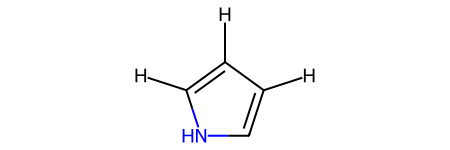

In [45]:
display(five_ring_mol)

In [51]:
for csd_id in tqdm(subset_csd_ids):
    try:
        original_mol = mol_iterator.molecule(csd_id)
        if isinstance(original_mol, Molecule):
            try:
                mol = ccdc_mol_to_rdkit_mol(original_mol)
            except Exception as e:
                logging.warning('CCDC mol could not be converted to RDKit :' + str(e))
                mol = None
        else:
            mol = original_mol

        Chem.Kekulize(mol)
        matches = mol.GetSubstructMatch(five_ring_mol, useChirality=True)
        if matches:
            import pdb;pdb.set_trace()
    
    except Exception as e:
        print(e)

  1%|▊                                                                                                            | 67/8632 [00:00<00:26, 327.41it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


  2%|█▋                                                                                                          | 135/8632 [00:00<00:27, 314.20it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): AKATAJ is not in the database


  3%|███                                                                                                         | 244/8632 [00:00<00:26, 312.10it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): FAJMIP is not in the database
DatabasePool::entry( DatabaseEntryIdentifier )(): KONZEU is not in the database
DatabasePool::entry( DatabaseEntryIdentifier )(): QIJZOY01 is not in the database


  4%|████▌                                                                                                       | 369/8632 [00:01<00:28, 286.13it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


  5%|█████▉                                                                                                      | 470/8632 [00:01<00:26, 308.45it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): EDAXIQ01 is not in the database


  6%|██████▋                                                                                                     | 532/8632 [00:01<00:27, 290.06it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


  8%|████████▌                                                                                                   | 686/8632 [00:02<00:30, 258.31it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


  9%|█████████▋                                                                                                  | 779/8632 [00:02<00:27, 286.27it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 10%|██████████▌                                                                                                 | 842/8632 [00:02<00:29, 266.20it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): NICOAC04 is not in the database


 13%|█████████████▌                                                                                             | 1090/8632 [00:03<00:27, 278.68it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 14%|██████████████▉                                                                                            | 1209/8632 [00:04<00:25, 287.46it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 15%|████████████████▎                                                                                          | 1316/8632 [00:04<00:22, 330.81it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 16%|█████████████████▌                                                                                         | 1420/8632 [00:04<00:22, 320.53it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 17%|██████████████████▍                                                                                        | 1484/8632 [00:05<00:28, 249.10it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 19%|███████████████████▊                                                                                       | 1597/8632 [00:05<00:29, 241.57it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 20%|█████████████████████▎                                                                                     | 1717/8632 [00:06<00:24, 286.35it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN26 is not in the database
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 21%|██████████████████████▍                                                                                    | 1814/8632 [00:06<00:28, 236.79it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): OMAKOE is not in the database


 22%|███████████████████████▋                                                                                   | 1909/8632 [00:06<00:24, 277.44it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): WOBHUR01 is not in the database
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 23%|████████████████████████▍                                                                                  | 1975/8632 [00:07<00:22, 298.10it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 24%|█████████████████████████▋                                                                                 | 2071/8632 [00:07<00:24, 271.95it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 25%|██████████████████████████▍                                                                                | 2134/8632 [00:07<00:23, 273.34it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 26%|████████████████████████████                                                                               | 2262/8632 [00:08<00:23, 266.18it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 28%|█████████████████████████████▊                                                                             | 2408/8632 [00:08<00:23, 269.10it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN24 is not in the database


 29%|██████████████████████████████▌                                                                            | 2470/8632 [00:09<00:22, 279.93it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 30%|███████████████████████████████▊                                                                           | 2571/8632 [00:09<00:20, 301.90it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 31%|████████████████████████████████▉                                                                          | 2660/8632 [00:09<00:23, 256.20it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 32%|██████████████████████████████████                                                                         | 2744/8632 [00:10<00:23, 254.65it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): NICOAC03 is not in the database


 33%|███████████████████████████████████▎                                                                       | 2849/8632 [00:10<00:18, 311.18it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 37%|███████████████████████████████████████▎                                                                   | 3175/8632 [00:11<00:19, 283.29it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 38%|████████████████████████████████████████▉                                                                  | 3303/8632 [00:12<00:19, 277.39it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 39%|██████████████████████████████████████████▏                                                                | 3405/8632 [00:12<00:18, 281.55it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 40%|██████████████████████████████████████████▉                                                                | 3465/8632 [00:12<00:21, 236.14it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): COTZAN06 is not in the database
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 41%|████████████████████████████████████████████                                                               | 3559/8632 [00:12<00:17, 282.95it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 43%|██████████████████████████████████████████████▎                                                            | 3735/8632 [00:13<00:17, 282.49it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 45%|████████████████████████████████████████████████                                                           | 3877/8632 [00:14<00:15, 312.14it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 46%|████████████████████████████████████████████████▉                                                          | 3943/8632 [00:14<00:15, 300.14it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 46%|█████████████████████████████████████████████████▋                                                         | 4007/8632 [00:14<00:20, 226.24it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 47%|██████████████████████████████████████████████████▍                                                        | 4065/8632 [00:14<00:19, 235.64it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 49%|████████████████████████████████████████████████████▎                                                      | 4217/8632 [00:15<00:17, 250.49it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 50%|█████████████████████████████████████████████████████▌                                                     | 4317/8632 [00:15<00:14, 300.34it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 52%|███████████████████████████████████████████████████████▏                                                   | 4450/8632 [00:16<00:14, 288.20it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): JOHJIB02 is not in the database


 53%|████████████████████████████████████████████████████████▍                                                  | 4555/8632 [00:16<00:12, 325.50it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): JOHJIB03 is not in the database


 54%|█████████████████████████████████████████████████████████▎                                                 | 4624/8632 [00:16<00:12, 312.76it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 56%|███████████████████████████████████████████████████████████▊                                               | 4821/8632 [00:17<00:14, 262.15it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): DUWXEA is not in the database
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 57%|████████████████████████████████████████████████████████████▌                                              | 4889/8632 [00:17<00:12, 289.10it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 57%|█████████████████████████████████████████████████████████████▎                                             | 4951/8632 [00:18<00:14, 257.21it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 60%|████████████████████████████████████████████████████████████████▏                                          | 5180/8632 [00:19<00:11, 304.20it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 61%|█████████████████████████████████████████████████████████████████▍                                         | 5279/8632 [00:19<00:13, 257.41it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN25 is not in the database
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 63%|███████████████████████████████████████████████████████████████████▋                                       | 5465/8632 [00:20<00:11, 264.50it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 64%|████████████████████████████████████████████████████████████████████▊                                      | 5550/8632 [00:20<00:11, 261.13it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 65%|█████████████████████████████████████████████████████████████████████▍                                     | 5602/8632 [00:20<00:12, 241.83it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): FUFXOV is not in the database


 67%|███████████████████████████████████████████████████████████████████████▎                                   | 5755/8632 [00:21<00:10, 268.80it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 67%|████████████████████████████████████████████████████████████████████████                                   | 5812/8632 [00:21<00:10, 273.56it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 70%|██████████████████████████████████████████████████████████████████████████▌                                | 6014/8632 [00:22<00:08, 299.00it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 72%|█████████████████████████████████████████████████████████████████████████████▍                             | 6249/8632 [00:22<00:07, 330.26it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): UNEYIV03 is not in the database
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 75%|████████████████████████████████████████████████████████████████████████████████                           | 6459/8632 [00:23<00:06, 316.53it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 6585/8632 [00:24<00:07, 278.47it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 6678/8632 [00:24<00:06, 296.64it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): CASWOK is not in the database


 80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 6874/8632 [00:25<00:05, 305.36it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 6999/8632 [00:25<00:05, 278.87it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 7067/8632 [00:25<00:05, 305.81it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)


 83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 7203/8632 [00:26<00:04, 299.59it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
DatabasePool::entry( DatabaseEntryIdentifier )(): QQQAUG18 is not in the database


 84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 7234/8632 [00:26<00:05, 270.30it/s]

Python argument types in
    rdkit.Chem.rdmolops.Kekulize(NoneType)
did not match C++ signature:
    Kekulize(RDKit::ROMol {lvalue} mol, bool clearAromaticFlags=False)
> /tmp/ipykernel_3118633/2606875397.py(1)<module>()
----> 1 for csd_id in tqdm(subset_csd_ids):
      2     try:
      3         original_mol = mol_iterator.molecule(csd_id)
      4         if isinstance(original_mol, Molecule):
      5             try:



ipdb>  Chem.MolToMolFile(mol, 'match.mol')


 84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 7234/8632 [00:40<00:05, 270.30it/s]

ipdb>  mol.GetProp('_Name')


'UVITEZ'


ipdb>  exit


 84%|██████████████████████████████████████████████████████████████████████████████████████████▊                 | 7259/8632 [01:42<00:19, 71.02it/s]


In [24]:
name = 'UVITEZ'

In [25]:
original_mol = mol_iterator.molecule(name)
if isinstance(original_mol, Molecule):
    try:
        mol = ccdc_mol_to_rdkit_mol(original_mol)
    except Exception as e:
        logging.warning('CCDC mol could not be converted to RDKit :' + str(e))
        mol = None
else:
    mol = original_mol

In [26]:
mol_angle_values = rg.get_mol_angle_values(mol)

In [27]:
pattern_str

'C(~N,-N)~N()~C(-N,~C)'

In [28]:
for pattern, values in mol_angle_values.items():
    print(pattern.to_string())

F()-B[-1](-O,-O)-F()
F()-B[-1](-F,-O)-O(-C)
C(-N,-C)=C(-C)-O(-B)
O(-B)-C(=C)-C(=C,-H)
O(-C)-B[-1](-F,-F)-O(-C)
O(-B)-C(=C)-C(~N,~C)
C(-C,-H)=C(-C)-O(-B)
C(-C,-H)=C(-O)-C(~N,~C)
C(~C,-C)~N(-H)~C(~C,-H)
C(~C,-C)~N(~C)-H()
C(~N,-C)~C(-H)~C(~C,-H)
C(~N,-C)~C(~C)-H()
C(=C,-C)-O()-B[-1](-F,-F,-O)
C(-O,-C)=C(-C)-N[+1](=C,-H)
C(-O,-C)=C(-N)-C(=C,-H)
C(-O,-C)=C(-H)-C(-O,=C)
C(-O,=C)-C(=C)-H()
N(~C,-H)~C(~C)-C(-O,=C)
C(~C,-H)~C(~N)-C(-O,=C)
C(-O,-C)=C(-C)-H()
C(-N,-C)=C(-O)-C(=C,-H)
C(-C,-H)=N[+1](-H)-C(=C,-C)
C(=C,-C)-N[+1](=C)-H()
C(-C,-H)=C(-H)-C(-N,=C)
C(-N,=C)-C(=C)-H()
C(=N,-H)-C(=C)-H()
C(-C,-H)=C(-H)-C(=N,-H)
C(-C,-H)=N[+1](-C)-H()
C(=C,-H)-C(=N)-H()
N[+1](-C,-H)=C(-C)-H()
N[+1](-C,-H)=C(-H)-C(=C,-H)
C(-C,-H)=C(-C)-H()
C(~N,-H)~C(~C)-H()
C(~N,-H)~C(-H)~C(~C,-H)
C(~C,-H)~N(~C)-H()
C(~C,-H)~C(~N)-H()
N(~C,-H)~C(~C)-H()
N(~C,-H)~C(-H)~C(~C,-H)
C(~C,-H)~C(~C)-H()
N[+1](=C,-H)-C(=C)-C(=C,-H)
N(~C,-H)~C(-C)~C(~C,-H)
O()=C(-C)-O[-1]()
O[-1]()-C(=O)-C(~C,~C)
O()=C(-O)-C(~C,~C)
C(~C,-C)~C(~C)-H()

In [50]:
Chem.Kekulize(mol)

In [61]:
pattern_str = 'C(-N,-H)-C(-H,-H)-C(-H,-H)-C(-N,-H)'

In [54]:
pattern = TorsionPattern.from_string(pattern_str)

In [49]:
patterns = list(rg.mixtures['torsion'].keys())

In [55]:
geometry_mixture = rg.mixtures['torsion'][pattern]
geometry_values = values['torsion'][pattern]

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


<Axes: ylabel='Count'>

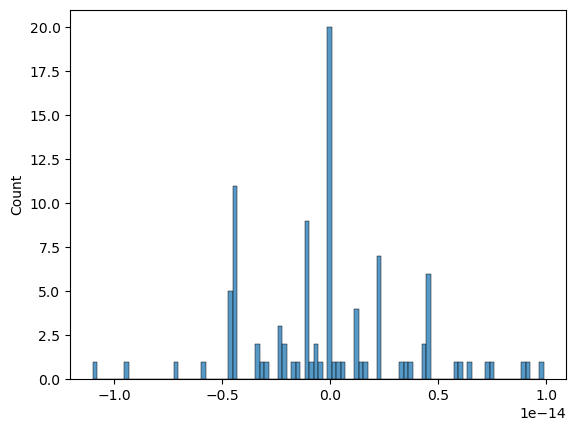

In [56]:
sns.histplot(geometry_values, bins=100)

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


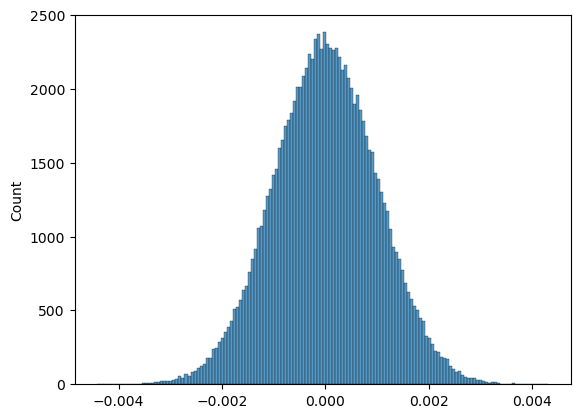

In [57]:
mixture = geometry_mixture.mixture
samples = plot_mixture(mixture)

In [60]:
mixture.covariances_

array([[[1.e-06]]])

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


<Axes: >

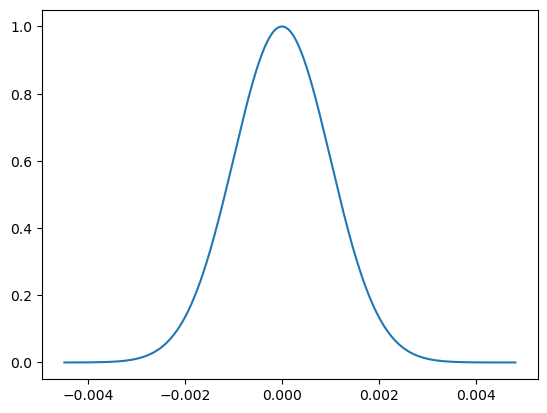

In [33]:
likelihoods = rg.get_likelihoods(mixture, samples)
sns.lineplot(x=samples, y=likelihoods)

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


<Axes: >

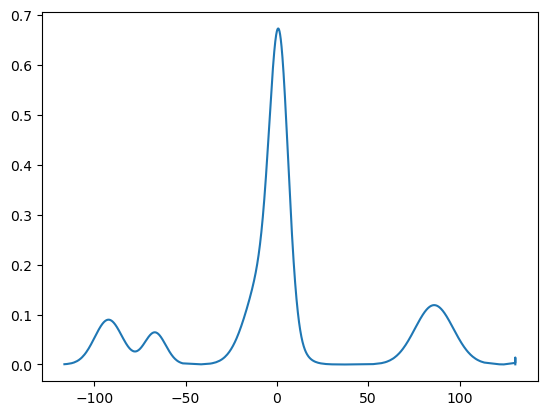

In [22]:
for pattern in rg.mixtures['bond'].keys():
    if pattern.to_string().startswith('C{6}(~C,~C)'):
        print(pattern.to_string())
        print()

C{6}(~C,~C)-C(-N,-H,-H)

C{6}(~C,~C)-H()

C{6}(~C,~C)-Cl()

C{6}(~C,~C)-C(-C,-H,-H)

C{6}(~C,~C)-O(-C)

C{6}(~C,~C)-N(-H,-H)

C{6}(~C,~C)-O(-H)

C{6}(~C,~C)-N(-C,-H)

C{6}(~C,~C)-C(-O,-C,-H)

C{6}(~C,~C)-C(=O,-O)

C{6}(~C,~C)-C(=C,-H)

C{6}(~C,~C)-C(=O,-N)

C{6}(~C,~C)-F()

C{6}(~C,~C)-C{6}(~C,~C)

C{6}(~C,~C)-C()

C{6}(~C,~C)=O()

C{6}(~C,~C)-C(-C,-C,-H)

C{6}(~C,~C)-S(=O,=O,-N)

C{6}(~C,~C)-C(=O,-C)

C{6}(~C,~C)-C(-N,-C,-H)

C{6}(~C,~C)-S(=O,=O,-O)

C{6}(~C,~C)-C(-O,-C,-C)

C{6}(~C,~C)-Br()

C{6}(~C,~C)-C(-H,-H,-H)

C{6}(~C,~C)-C(-C,-C,-C)

C{6}(~C,~C)-C(#N)

C{6}(~C,~C)-C(-F,-F,-F)

C{6}(~C,~C)-I()

C{6}(~C,~C)-N(-C,-C)



In [17]:
pattern.to_string()

'C{8,5,5}()-H()'

In [73]:
pattern_str = 'C{6}(~C,~C)-C(#N)'

In [74]:
pattern = BondPattern.from_string(pattern_str)

In [28]:
rg.mixtures['bond'][pattern.generalize()]

GeometryMixture(mixture=GaussianMixture(n_components=3), max_likelihood=0.6595577411582113, shift=0)

In [75]:
geometry_mixture = rg.mixtures['bond'][pattern]
geometry_values = values['bond'][pattern]

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


<Axes: ylabel='Count'>

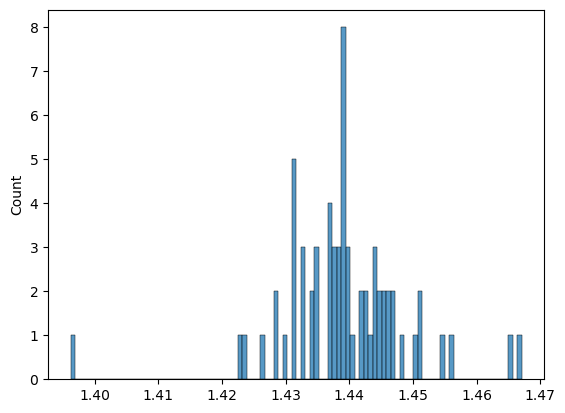

In [76]:
sns.histplot(geometry_values, bins=100)

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


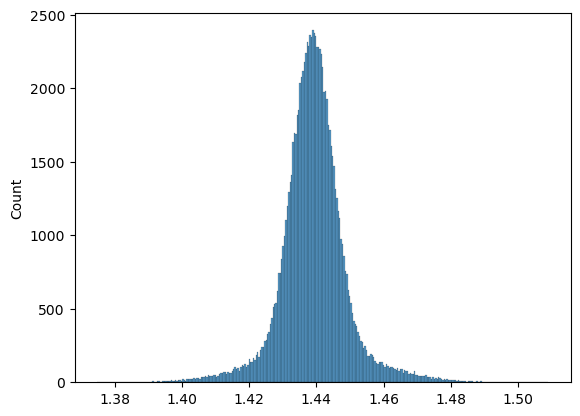

In [77]:
mixture = geometry_mixture.mixture
samples = plot_mixture(mixture)

In [110]:
smiles = 'OCC1=CC=CC1=O'
mol = Chem.MolFromSmiles(smiles)

In [113]:
ri = mol.GetRingInfo()

In [115]:
ri.BondRings()

((2, 3, 4, 5, 7),)

In [116]:
ri.AtomRings()

((2, 3, 4, 5, 6),)

In [119]:
ring_sizes = (6, 5)
'{' + ','.join([str(rs) for rs in ring_sizes]) + '}'

'{6,5}'

In [123]:
tuple([])

()

In [90]:
smiles = 'OCC1=CC=Cc1=o'
mol = Chem.MolFromSmiles(smiles)

In [91]:
mol

In [84]:
mol.Debug()

Atoms:
	0 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: 4 arom?: 0 chi: 0
	1 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: 4 arom?: 0 chi: 0
	2 6 C chg: 0  deg: 3 exp: 4 imp: 0 hyb: 3 arom?: 0 chi: 0
	3 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 0 chi: 0
	4 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 0 chi: 0
	5 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 0 chi: 0
	6 6 C chg: 0  deg: 3 exp: 4 imp: 0 hyb: 3 arom?: 0 chi: 0
	7 8 O chg: 0  deg: 1 exp: 2 imp: 0 hyb: 3 arom?: 0 chi: 0
Bonds:
	0 0->1 order: 1 conj?: 0 aromatic?: 0
	1 1->2 order: 1 conj?: 0 aromatic?: 0
	2 2->3 order: 2 conj?: 1 aromatic?: 0
	3 3->4 order: 1 conj?: 1 aromatic?: 0
	4 4->5 order: 2 conj?: 1 aromatic?: 0
	5 5->6 order: 1 conj?: 1 aromatic?: 0
	6 6->7 order: 2 conj?: 1 aromatic?: 0
	7 6->2 order: 1 conj?: 1 aromatic?: 0


In [47]:
from genbench3d.geometry import ReferenceGeometry

In [49]:
likelihoods = rg.get_likelihoods(mixture, samples)

/home/bb596/ssd/miniforge3/envs/csd/lib/python3.9/site-packages/pandas/core/algorithms.py:485: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps.dtype], [])


<Axes: >

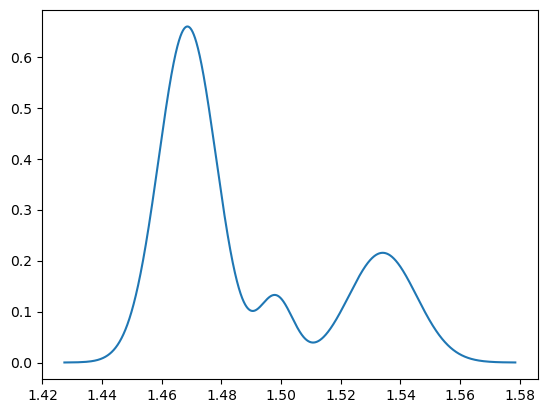

In [50]:
sns.lineplot(x=samples, y=likelihoods)

In [47]:
writer = Chem.SDWriter('pattern_mols.sdf')

for csd_id in tqdm(subset_csd_ids):
    try:
        original_mol = mol_iterator.molecule(csd_id)
        if isinstance(original_mol, Molecule):
            try:
                mol = ccdc_mol_to_rdkit_mol(original_mol)
            except Exception as e:
                logging.warning('CCDC mol could not be converted to RDKit :' + str(e))
                mol = None
        else:
            mol = original_mol
        
        if mol is not None:
            assert isinstance(mol, Mol)
            
            mol_bond_values = rg.get_mol_bond_lengths(mol)
            for bond_pattern, bond_values in mol_bond_values.items():
                if bond_pattern == pattern:
                    # print(f'pattern found: {bond_values}')
                    writer.write(mol)
                    if any([value > 1.53 for value in bond_values]):
                        print(mol.GetProp('_Name'))

    except Exception as e:
        print(e)

writer.close()

  2%|█▋                                                                                                           | 136/8632 [00:01<01:37, 87.51it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): AKATAJ is not in the database


  2%|██▌                                                                                                          | 198/8632 [00:02<01:33, 90.48it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): FAJMIP is not in the database


  3%|██▉                                                                                                          | 233/8632 [00:02<01:25, 98.45it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): KONZEU is not in the database
DatabasePool::entry( DatabaseEntryIdentifier )(): QIJZOY01 is not in the database


  5%|█████▎                                                                                                       | 423/8632 [00:04<01:30, 90.59it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): EDAXIQ01 is not in the database


 10%|██████████▊                                                                                                  | 858/8632 [00:10<01:48, 71.83it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): NICOAC04 is not in the database


 19%|█████████████████████                                                                                       | 1679/8632 [00:20<01:18, 88.99it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN26 is not in the database


 21%|██████████████████████▌                                                                                     | 1808/8632 [00:21<01:09, 98.78it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): OMAKOE is not in the database


 22%|███████████████████████▌                                                                                    | 1882/8632 [00:22<01:13, 91.98it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): WOBHUR01 is not in the database


 28%|█████████████████████████████▊                                                                              | 2380/8632 [00:28<01:13, 84.77it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN24 is not in the database


 32%|██████████████████████████████████▊                                                                         | 2778/8632 [00:33<01:08, 85.69it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): NICOAC03 is not in the database


 33%|███████████████████████████████████▋                                                                        | 2856/8632 [00:34<01:00, 96.08it/s]

DIYZAO


 40%|███████████████████████████████████████████▋                                                                | 3489/8632 [00:42<01:26, 59.45it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): COTZAN06 is not in the database


 51%|███████████████████████████████████████████████████████▎                                                    | 4416/8632 [00:53<00:43, 97.19it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): JOHJIB02 is not in the database


 52%|████████████████████████████████████████████████████████▋                                                   | 4530/8632 [00:55<01:08, 59.52it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): JOHJIB03 is not in the database


 55%|███████████████████████████████████████████████████████████▊                                                | 4784/8632 [00:58<00:49, 78.08it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): DUWXEA is not in the database


 61%|██████████████████████████████████████████████████████████████████                                          | 5279/8632 [01:04<00:38, 86.53it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CBMZPN25 is not in the database


 65%|█████████████████████████████████████████████████████████████████████▋                                      | 5573/8632 [01:08<00:40, 75.96it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): FUFXOV is not in the database


 72%|█████████████████████████████████████████████████████████████████████████████▊                              | 6218/8632 [01:15<00:25, 93.18it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): UNEYIV03 is not in the database


 78%|███████████████████████████████████████████████████████████████████████████████████▊                        | 6701/8632 [01:21<00:23, 82.18it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): CASWOK is not in the database


 84%|██████████████████████████████████████████████████████████████████████████████████████████▌                 | 7237/8632 [01:27<00:16, 84.13it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): QQQAUG18 is not in the database


 88%|███████████████████████████████████████████████████████████████████████████████████████████████▍            | 7632/8632 [01:32<00:13, 73.43it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): KAHLOX is not in the database


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████▍          | 7790/8632 [01:34<00:09, 86.21it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): ORIGON is not in the database


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 8059/8632 [01:37<00:07, 76.70it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): MALXEF is not in the database


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 8267/8632 [01:40<00:04, 74.18it/s]

DatabasePool::entry( DatabaseEntryIdentifier )(): WOBHUR is not in the database


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8632/8632 [01:44<00:00, 82.53it/s]
